# Lineare Regression

**Lineare Regression in der Vektorschreibweise:**  
$\hat y = h_{\theta}(\textbf{x})=\theta^{T}*\textbf{x}$

* $\theta$: Parametervektor mit Bias-Term (Achsenabschnitt) und der $\theta_{0}$ Gewichte aller Merkmale
* $\theta^{T}$: Zeilenvektor (transponiert) mit allen Merkmalsgewichten
* $\textbf{x}$: Zeilenvektor mit allen Merkmalen
* **Wichtig:** $x_{0}$ ist immer 1. Somit ist $\theta_{0}$ immer der Achsenabschnitt.
* $\theta^{T} * \textbf{x}$ ist das Skalarprodukt

Damit man das Modell trainieren (respektive die besten Werte für $\Theta$) ermitteln kann, braucht man ein Qualitätsmass für die Anpassung.
Häufig wird der RMSE (Root Mean Square Error) oder auch nur der MSE (Mean Square Error) verwendet.

$MSE(X, h_{\theta})=\frac{1}{m}\sum_{i=1}^m(\theta^{T}*x^{(i)}-y^{(i)})^2$

* $h_{\theta}$ sagt aus, dass das Modell durch den Vektor $\theta$ paramet

## Normalengleichung

Mit der Normalengleichung kann man einen Wert für $\theta$ finden, welcher die Kostenfunktion minimiert.

$\hat \theta = (X^{T}* X)^{-1} * X^{T} * y$

* $y$ ist der Vektor mit den Zielwerten (Labels)
* Das Hoch minus 1 macht die Matrix inversiv. Siehe: [Inverse Matrix](https://de.wikipedia.org/wiki/Inverse_Matrix)

In [24]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

Text(0,0.5,'$y$')

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


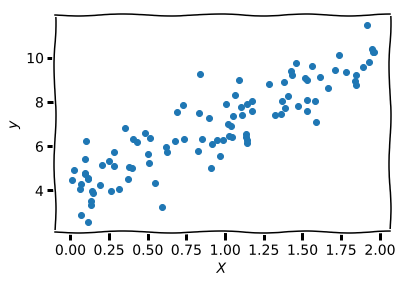

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xkcd()

plt.scatter(X, y)
plt.xlabel('$X$')
plt.ylabel('$y$')

In [26]:
X.shape

(100, 1)

In [27]:
# Füge x0 = 1 zu jedem Datenpunkt hinzu
X_b = np.c_[np.ones((100,1)), X]
X_b.shape

(100, 2)

In [28]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06198158],
       [2.99727339]])

In [29]:
X_new = np.array([[0], [2]])
# Füge x0 = 1 zu jedem Datenpunkt hinzu
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [30]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.06198158],
       [10.05652836]])

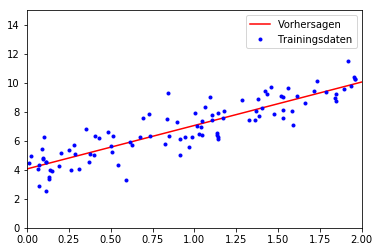

In [31]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend(["Vorhersagen", "Trainingsdaten"])
plt.show()

## Mit Sklearn

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(F'Achsenabweichung: {lin_reg.intercept_}\nGewichte: {lin_reg.coef_}')

Achsenabweichung: [4.06198158]
Gewichte: [[2.99727339]]


In [33]:
lin_reg.predict(X_new)

array([[ 4.06198158],
       [10.05652836]])

### Nachteil der Normalengleichung
Die Normalengleichung wird bei sehr vielen Merkmalen sehr langsam.

### Vorteil der Normalengleichung
Sie kann grosse Datensätze sehr effizient behandeln.  
Vorhersagen bei doppelt so vielen Datensätzen dauern nur etwa doppel so lange.

## Gradientenverfahren

Das Gradientenverfahren verändert die Parameter iterativ um so die Kostenfunktion zu minimieren.

1. $\theta$ wird mit Zufallszahlen befüllt (zufällige Initialisierung)
2. Die Parameter werden schrittweise verbessert um die Kostenfunktion zu senken
3. Der Algorithmus konvergiert bei einem Minimum

Die Lernrate (ein Hyperparameter) bestimmt die Grösse der Schritte:
* Bei einer zu kleinen Lernrate kann es sehr lange dauern, bis ein Minimum gefunden wird.
* Bei einer zu grossen Lernrate kann es passieren, dass nie das Minimum gefunden wird, da dieses ständig übersprungen wird.

MSE ist als Kostenfunktin für lineare Regressionsmodelle eine **konvexe Funktion**. Dies bedeutet, dass wenn man zwei beliebige Punkte auf der Kurve auswählt, ihre lineare Verbindung niemals die Kurve schneidet.

<img src="images/training_linear_models/konvex.png" alt="konvex function" width="400"/>

Somit hat die Kostenfunktion die Form einer Schüssel mit einem Minimum. Damit man dieses Minimum möglichst schnell findet, ist es wichtig, dass **alle Merkmale ähnlich skaliert sind**.
Dies macht die Schüssel schön rund, also zu einer Halbkugel. Bei unskalierten Merkmalen kann man sich auch eine Ellipse-artige Schüssel vorstellen, bei einer solchen kann es länger dauern, bis man das Minimum erreicht.

### Batch-Gradientenverfahren

Das Batch-Gradientenverfahren funktioniert mit partieller Ableitung. Es rechnet aus, wie stark sich die Kostenfunktion ändert, wenn man den Parameter $\theta_{j}$ ändert.

$$\frac{\delta}{\delta \theta_{j}} * MSE(X, h_{\theta})=\frac{2}{m}\sum_{i=1}^m(\theta^{T}*x^{(i)}-y^{(i)})x_{j}^{(i)}$$

Diese Ableitung wird aber nicht einzeln sondern gleich als Vektor für alle Modellparameter berechnet.

$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T*(X*\theta-y)$$

Mit dieser Formel kann man den Gradientenvektor ermitteln, der vom Minimum weg weist. Um sich dem Minimum zu nähern muss man also in die entgegengesetzte Richtung gehen. Dazu subtrahiert man $\nabla_{\theta}MSE(\theta)$ von $\theta$.
Die Lernrate $\eta$ bestimmt, wie gross die Schritte sein sollen.
$$\theta^{nächster Schritt}=\theta - \eta\nabla_{\theta}MSE(\theta)$$

> Das Batch-Gradientenverfahren ist bei grossen Datensätzen sehr langsam, dafür ist es geeignet bei vielen Merkmalen.

Mit Hilfe der Gittersuche kann eine geeignete Lernrate gefunden werden.  
Um die Anzahl Iterationen zu bestimmen kann man die Anzahl Iterationen auf einen sehr hohen Wert setzen und den Algorithmus anhalten, sobald der Gradientenvektor ganz klein wird. Der Gradientenvektor ist dann so klein, das er sich dem Minimum kaum noch nähern kann. Dies wird als Toleranz bezeichnet.

In [34]:
# Lernrate eta
eta = 0.1
n_iter = 1000
m = 100

In [35]:
# Zufällige Initialisierung
theta = np.random.randn(2,1)

for iteration in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta * gradients

In [36]:
theta

array([[4.06198158],
       [2.99727339]])

### Stochastisches Gradientenverfahren

Das SGD (Stochastic Gradient Descent) wählt für jeden Schritt nur einen Datenpunkt zufällig aus. Dies macht ihn viel schneller als das Batch-Gradientenverfahren, aber durch seine Zufälligkeit hüpftf die Kostenfunktion ständig auf und ab und findet nie das perfekte Minimum.
> SGD lässt sich auch als Out-of-Core-Algorithmus implementieren

SGD kann durch die Zufälligkeit gut lokalen Minima entfliehen, kommt aber beim Minimum nie zur Ruhe.  
**Simulated Annealing:**  
Man wählt die Schritte zu Beginn gross um den lokalen Minima zu entfliehen und dann immer kleiner, damit der Algorithmus beim globalen Minima stehen bleibt.
Durch dieses "langsame Abkühlen" wird ein bestmögliches Resultat erzielt.

**Learning Schedule:**  
Dies ist die Funktion zum festlegen der Lernrate.

In [37]:
n_epochs = 50
# Hyperparameter für den Learning Schedule
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

In [38]:
# Zufällige Initialisierung
theta = np.random.randn(2,1)

In [39]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [40]:
theta

array([[4.0447901 ],
       [2.99813926]])

### Mit Sklearn

In [41]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(F'Achsenabweichung: {sgd_reg.intercept_}\nGewichte: {sgd_reg.coef_}')

Achsenabweichung: [4.05680318]
Gewichte: [2.97743512]


### Mini-Batch-Gradientenverfahren

Dies ist eine Kombination des Batch- und des stochastische Gradientenverfahrens. Es werden anstatt nur ein zufälliger Datenpunkt, eine selbst festgelegte Menge an zufällig gewählten Datenpunkten gewählt. Somit muss nicht bei jedem Durchlauf der gesamte Datensatzt verwendet werden aber es ist auch nicht so stark flukturierend wie wenn nur ein einziger Datenpunkt gewählt wird.

# Polynomielle Regression

Auch wenn die Daten nicht linear sind, kann man sie trotzdem mit einem Linearen Modell verwenden. Dazu fügt man den Daten einfach ein weiteres vom ersten Merkaml abhängiges Merkmal hinzu.

## Mit Sklearn
Man kann PolynomialFeatures von sklearn verwenden, um ein weitere Merkmale aus den bestehnden zu erzeugen. `degree=2` steht für das Quadrat (Polynom 2. Grades).

**Achtung:**  
Wenn man bereits mehrere Merkmale hat und einen hohes Polynom wählt, so wächst die Anzahl Merkmale explosionsartig!

In [42]:
m = 100
# Nicht lineare Daten
X = 6 * np.random.rand(m, 1) - 3
# Quadratische Gleichung y = ax^2 + bx + c
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Erstes Merkmal ist immer 1:  
(Beachte das oben künstlich eingefügte Rauschen: `np.random.randn(m, 1)`)  
$y = 0.5^2 + x + 2.0$

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.32197279])

In [44]:
X_poly[0]

array([-0.32197279,  0.10366648])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(F'Achsenabweichung: {lin_reg.intercept_}\nGewichte: {lin_reg.coef_}')

Achsenabweichung: [2.06965238]
Gewichte: [[0.96684438 0.48716201]]


$y = 0.451^2 + 1.146* x + 2.056$  
$y = 0.5^2 + x + 2.0$

# Lernkurven

Um Overfitting oder Underfitting zu erkennen, kann man wie in Kapitel 2 eine Kreuzvalidierung durchführen und die Verallgemeinerungsleistung abschätzen:
* Das Modell verallgemeinert sehr gut bei den Trainingsdaten, aber schlecht bei den Validierungsdaten
    * Overfitting
* Das Modell verallgemeinert bei Trainings- und Validierungsdaten schlecht
    * Underfitting

Eine andere Möglichkeit Under- und Overfitting zu erkennen sind **Lernkurven**.

Eine Lernkurve zeigt die Leistung bei den Trainings- und Validierungsdaten abhängig von der Grösse der Trainingsdaten.

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    # Damit nur das wichtige Angezeigt wird
    plt.ylim(0, 5)
    plt.legend()
    pass

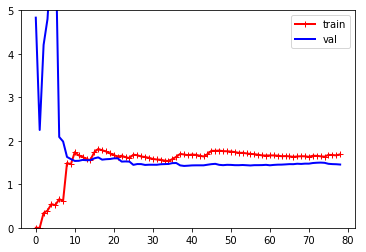

In [66]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* Am Anfang ist die Lernkurve bei den Validierungsdaten sehr schlecht (hoch), da es mit wenigen Daten schlecht verallgemeinern kann.
* Bei den Trainingsdaten ist sie bei wenigen Daten hingegen sehr gut (tief), da es auf die wenigen Daten die es erst kennt, sehr gut vorhersagen kann.

### Underfitting
Wenn die Lernkurve beider Datensätze ein Plateau erreichen und weit oben liegen, dann liegt Underfitting vor.

**Beheben:**  
Underfitting kann man nicht mit mehr Daten beheben. Da die Daten zu komplex sind für das Modell muss ein komplexeres Modell gewählt werden.

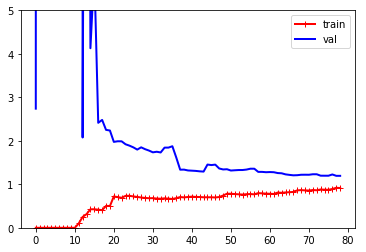

In [84]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

* Der Fehler auf den Trainingsdaten ist kleiner als beim Linearen Modell
* Es gibt eine grosse Lücke zwischen Trainings- und Validierungsfehler

### Overfitting
Die grosse Lücke zwischen Trainings- und Validierungsfehler besteht wegen dem Overfitting.

**Beheben:**  
Overfitting kann man unter anderem beheben, indem man solange mehr Trainingsdaten bereitstellt, bis der Validierungsfehler dem Trainingsfehler entspricht.

## Das Gleichgewicht zwischen Bias und Varianz
### Verallgemeinerungsfehler
Man setzt den Verallgemeinerungsfehler eines Modells aus der Summe folgender Komponenten zusammen:

**Bias:**  
Bias wird durch falsche Annahmen auf die Daten verursacht. Wenn man etwa Annimmt, dass die Daten linear sind, obwohl sie quadratisch wäre, steigt das Bias.
Ein Modell mit hohem Bias underfitted die Trainingsdaten sehr wahrscheinlich.

**Varianz:**  
Wenn das Modell zu empfindlich für die Daten ist, so steigt die Varianz. ein Modell mit hoher Varianz overfitted die Trainingsdaten eher.

**Nicht reduzierbare Fehler:**  
Diese Fehler werden durch das Rauschen in den Daten oder fehlerhafte Daten verursacht. Um diesen Fehler zu verhindern, muss man die Trainingsdaten bereinigen und gut aufbereiten.

# Regularisierte lineare Modelle

Eine weitere Methode um Overfitting entgegenzuwirken ist es, das Modell zu regulieren/einschränken.

## Ridge-Regression

Man addiert dazu einen Regulierungsterm der Kostenfunktion hinzu. Dieser soll allerdings nur beim Trainieren zur Kostenfunktion addiert werden, nicht beim evaluieren der Leistung eines trainierten Modells!
Es ist oft so, dass die Kostenfunktion beim Trainieren sich vom Qualitätsmass unterscheidet.

**Regularisierungsterm:**  
$\alpha\sum_{i=1}^n\theta_i^2$

Je höher $\alpha$ gewählt ist, desto stärker ist das Modell regularisiert. (Desto näher sind die Gewichte bei null)

**Kostenfunktion:**  
$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n\theta_i^2$

**Wichtig:**  
* $\theta_0$ wird nicht regularisiert. ($i=1$)
* Die Daten sollten vor einer Regularisierung skaliert werden

**Geschlossene Form der Ridge-Regression:**  
$\hat\theta = (X^T * X + \alpha A)^{-1} * X^T * y$
* $A$ ist eine Identitätsmatrix

In [90]:
from sklearn.linear_model import Ridge
ridge_reg =  Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.96341543]])

In [100]:
# Penalty l2 entspricht der Ridge-Regression
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.89803181])

## Lasso-Regression
> Least Absolute Shrinkage and Selection Operator Regression

**Kostenfunktion:**  
$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^n|\theta_i|$

**Wichtig:**  
Die Lasso-Regression eliminiert die am wenigsten relevanten Merkmale komplett. (Sie werden auf 0 gesetzt)

In [95]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.91378058])

In [96]:
# Penalty l1 entspricht der Lasso-Regression
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([3.87934362])

## Elastic Net
Elasitc Net ist lediglich eine Mischung aus den Ridge- und der Lasso-Regularisierungstermen. Mit dem Parameter $r$ kann das Mischverhältniss festgelegt werden:
* $r=0$ -> Ridge
* $r=1$ -> Lasso

In [99]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.91725327])

## Wann soll welche Regularisierung verwendet werden?
Man sollte nie eine Lineare Regression ohne Regularisierung verwenden.
Grundsätzlich kann man Ridge verwenden. Wenn man jedoch vermutet, dass einige Merkmale unwichtig sind, so sollte man Elastic Net oder Lasso verwenden. Hier gilt es grundsätzlich Elastic Net Lasso vorzuziehen, da sich Lasso sprunghaft verhalten kann, wenn verschiedene Merkmale miteinander korrelieren oder es mehr Merkmale als Datenpunkte gibt.

## Early Stopping
Die wohl einfachste Art der Regularisierung ist es, das Training zu stoppen, sobald der Validierungsfehler ein Minimum erreicht hat.

### Beim stochastischen- und Mini-Batch-Gradientenverfahren
Bei diesen Verfahren, sind die Kurvenverläufe nicht immer so glatt und es kann daher schwierig sein zu erkennen, ob nun das Minimum erreicht wurde.
Um dies zu umgehen, trainiert man einfach noch ein wenig weiter und beobachtet, ob der Fehler eine Weile oberhalb des Minimums bleibt. Ist dies der Fall, setzt man die Modellparameter wieder auf den Stand, an dem der Validierungsfehler minimal war.

In [140]:
# Daten immer skalieren
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [141]:
X_poly_scaled[:2]

array([[-0.0577411 , -1.1502517 ],
       [-1.47517357,  1.80405634]])

In [142]:
X_poly[:2]

array([[-0.32197279,  0.10366648],
       [-2.83870119,  8.05822444]])

In [153]:
from copy import deepcopy

# warm_start=True -> die Methode fit() trainiert das bestehende Modell mit den neuen Daten weiter, anstatt von vorne zu beginnen.
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

X_train_poly_scaled, X_val_poly_scaled, y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        # deepcopy kopiert auch die Daten (Trainiertes Modell) während sklearn.base.clone ohne Daten kopiert.
        best_model = deepcopy(sgd_reg)

print(best_epoch)
best_model.predict([[1.5]])

90


array([5.08208783])

In [154]:
best_model

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

# Logistische Regression
Die Logistische Regression kann auch als Klassifizierer verwendet werden. Dabei wird für jede Kategorie eine Wahrscheinlichkeit der Zugehörigkeit berechnet.

Dabei wird eine sigmoide Funktion verwendet, welche nur werte zwischen 1 und 0 ausgeben kann.

$\hat p = h_\theta(x) = \sigma(\theta^T * X)$

**Logistische Funktion:**  
$\sigma(t) = \frac{1}{1 + \exp(-t)}$

**Vorhersage eines logistischen Regressionsmodells:**  
$\hat y = 0  | \hat p \lt 0.5$  
$\hat y = 1  | \hat p \geq 0.5$

Das Modell sagt 1 vorher, wenn $\theta^T * x$ positiv ist und 0 wenn es negativ ist.

**Kostenfunktion eines einzelnen Trainingspunk:**  
$c(\theta) = -log(\hat p) | y = 1$  
$c(\theta) = -log(1 - \hat p) | y = 0$

Die Kosten sind hoch, wenn ein negativer Datenpunkt nahe 1 ist oder wenn ein positiver Datenpunkt nahe 0 ist. Dies ist gut, denn in diesen Fällen ist der Fehler ja tatsächlich vorhanden. Ist ein positiver Datenpunkt nahe 1 oder ein negativer nahe 0, so sind die Kosten klein.

**Log Loss (Kostenfunktion bei der logistischen Regression):**  
$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat p^{(i)}) + (1 -y^{(i)})log(1 - \hat p^{(i)})]$

Da die Funktion konvex ist, kann man das Gradientenverfahren oder ein anderer Optimierungsalgorithmus verwenden und dieser wird garantiert das globale Optimum finden.

**Parielle Ableitung der logistischen Kostenfunktion:**  
$\frac{\delta}{\delta\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m(\sigma(\theta^T * x^{(i)}) - y^{(i)})x_j^{(i)}$

Für jeden Datenpunkt wird der Vorhersagefehler berechnet und mit dem $j^{ten}$ Merkmalswert multipliziert. Anschliessend wird daraus der Mittelwert aller Trainingsdatenpunkte berechnet.

In [156]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [158]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [159]:
# petal width
X = iris['data'][:,3:]
# 1 wenn iris-virginica, sonst 0
y = (iris['target'] == 2).astype(np.int)

In [162]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

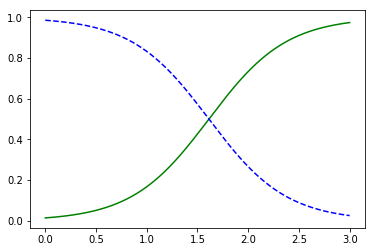

In [164]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Nicht-Virginica')

In [165]:
X_new = np.linspace(0,3,1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

(-0.02, 1.02)

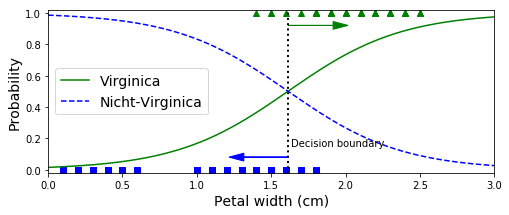

In [175]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(X[y==0], y[y==0], 'bs')
ax.plot(X[y==1], y[y==1], 'g^')

ax.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
ax.plot(X_new, y_proba[:, 1], 'g-', label='Virginica')
ax.plot(X_new, y_proba[:, 0], 'b--', label='Nicht-Virginica')

plt.text(decision_boundary+0.02, 0.15, 'Decision boundary')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b' )
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g' )

ax.set_xlabel('Petal width (cm)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.legend(loc='center left', fontsize=14)
ax.set_xlim(0,3)
ax.set_ylim(-0.02, 1.02)

* Die Entscheidungsgrenze liegt etwa bei 1.6cm, dort ist nicht sicher, ob es sich um eine Virginica oder eine Nicht-Virginica handelt
* Wird anstatt `predict_proba()` nur `predict()` verwendet, wird automatisch die Kategorie mit der höchsten Wahrscheinlichkeit gewählt.

In [180]:
log_reg.predict([[1.5],[1.7]])

array([0, 1])

In [181]:
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.int)

In [193]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [195]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

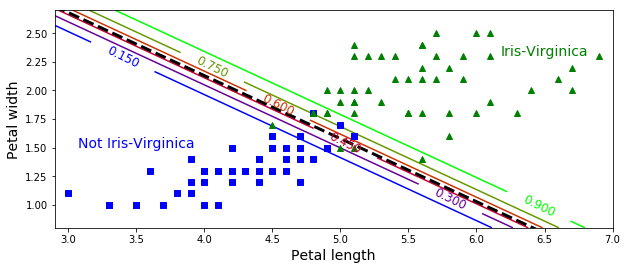

In [205]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

* Alle Punkte rechts oberhalb der grünen Linie sind mit einer 90% Wahrscheinlichkeit Iris-Virginica

### Regularisierung
Sklearn fügt der Logistischen Regression standardmässig einen l2-Strafterm hinzu.
> Bei der logistischen Regression heisst der Hyperparameter zum Steuern der Regularisierung nicht alpha sondern C (Der Kehrwert von alpha). Desto grösser C, desto **schwächer** ist das Modell regularisiert.

# Softmax-Regression

Die Logistische-Regression lässt sich direkt auf mehrere Kategorien verallgemeinern. Wenn man mehrere Kategorien hat, nennt sich die Softmax-Regression oder multinomiale logistische Regression.

Für einen Datenpunkt **x** wird für jede Kategorie ein Score berechnet. Der Score wird in die Softmax-Funktion eingesetzt, welche für jede Kategorie eine Wahrscheinlichkeit berrechnet.
Anders als bei den bisherigen Regressionsalgorithmen gibt es hier nicht einen Parametervektor $\theta$ sondern eine Parametermatrix $\Theta$ mit einem Parametervektor für jede Kategorie als Zeilen.

> Die Softmax-Regression verwendet zwar mehrere Kategorien, kann aber nur eine Vohrhersagen. Man sollte sie daher nur verwenden, wenn sich die Kategorien gegenseitig ausschliessen.  
**Mutlinomial/Multiclass != Multilabel** See: [What is the difference between multilabel and multiclass classification?](https://www.quora.com/What-is-the-difference-between-multilabel-and-multiclass-classification)

Bei der Softmax-Regression wird die Kreuzentropie als Kostenfunktion verwendet. Mit dieser wird gemessen, wie gut die Wahrscheinlichkeiten der Kategorien mit den Zielkategorien übereinstimmen.

### Mit Sklearn
Die Logistische-Regression verwendet bei mehr als zwei Kategorien standardmässig eine One-versus-All-Strategie. Um Softmax zu verwenden muss man den Hyperparameter `multiclass='multinomial'` setzten und einen Solver angeben, der die Softmax-Regression unterstützt. **`'lbfgs'`** unterstützt die Softmax-Regression.

In [206]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [207]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [208]:
softmax_reg.predict([[5,2]])

array([2])

In [209]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134078e-07, 5.75276067e-02, 9.42471760e-01]])

In [211]:
softmax_reg.coef_

array([[-4.58536208, -2.24803476],
       [ 0.16014121, -2.15447875],
       [ 4.42522087,  4.40251352]])

In [212]:
softmax_reg.intercept_

array([ 18.87940406,   6.38186888, -25.26127294])

# Übungen

**Welchen Trainingsalgorithmus für die lineare Regression können sie verwenden, wenn sie einen Trainingsdatensatz mit Millionen Merkmalen haben?**  
> Das stochastische oder Mini-Batch Gradientenverfahren. Wenn die Daten in den Speicher passen kann auch das Batch-Gradientenverfahren verwendet werden. Die Normalengleichung bräuchte zu viel Speicher.

**Nehmen sie an, dass die Merkmale in Ihrem Trainingsdatensatz unterschiedlich skaliert sind. Welche Algorithmen würden dadurch in Mitleidenschaft gezogen und in welcher Weise? Was kann man dagegen tun?**  
Die Gradientenverfahren würden dadurch in Mitleidenschaft gezogen. Dieses Optimierungsverfahren funktioniert am besten mit einer schön runden Schüssel mit einem globalen Minimum. Sind die Merkmale nicht skaliert, ist die Schüssel nicht schön rund und es dauert länger, bis das Optimum gefunden wird. Man könnte die Merkmale zuvor z.B. mit dem StandardScaler von sklearn skalieren.
> Die Normalengleichung funktioniert auch ohne skalierung. Bei Regularisierten Modellen und unskalierten Daten ist vorsicht geboten, da sich eine suboptimale Lösung entwickeln könnte. Die Regularisierung legt mehr Gewicht auf hohe Werte.

**Kann das Gradientenverfahren bei einem logistischen Regressionsmodell in einem lokalen Minimum stecken bleiben?**  
Nein, den die Kostenfunktion bei logistischen Regressionsmodellen ist konvex, dies bedeutet, das zwischen zwei Punkten auf dem Graphen immer eine gerade Linie gezogen werden kann ohne den Graph zu schneiden.

**Führen alle Algorithmen für das Gradientenverfahren zum gleichen Modell, vorausgesetzt, sie laufen lange genug?**  
Nur fast. Das Batch-Gradientenverfahren kann sich am genausten dem Optimum nähern, während das stochastische Gradientenverfahren durch seine Zufälligkeit immer in der nähe des Optimums herumspringen wird. Das Mini-Batch-Gradientenverfahren wird eine Mischung aus beiden erzielen können. Indem man die Lernrate im Verlauf immer mehr senkt (die Schritte kleiner macht), kann man dem Problem der Zufälligkeit entgegenwirken.  
Das Vorhersagen ist aber bei allen gleich, sie unterscheiden sich nur im Training.

**Nehmen sie an, sie verwenden das Batch-Gradientenverfahren und plotten den Validierungsfehler in jeder Epoche. Was passiert vermutlich, wenn der Validierungsfehler ständig steigt? Wie können sie dies beheben?**  
Wenn nur der Validierungsfehler ansteigt ist dies ein Zeichen von Overfitten. Dann sollte man das Training stoppen:
* Das Training beobachten und stoppen, sobald der Validierungsfehler wieder ansteigt. Danach das Modell zum Zeitpunkt des tiefsten Validierungsfehlers verwenden

Wenn der Trainings- und der Validierungsfehler ansteigt divergiert der Algorithmus. Dann sollte man die Lernrate senken.

**Ist es eine gute Idee, das Mini-Batch-Gradientenverfahren sofort zu unterbrechen, sobald der Validierungsfehler steigt?**  
> Nein, durch die Zufälligkeit kann es sein, dass sich das Modell nicht bei jeder Iteration verbessert. Daher sollte man die Modelle nach jeder Epoche zwischenspeichern und auf das Beste zurückgreifen, wenn der Validierungsfehler stagniert.

**Welcher der besprochenen Algorithmen für das Gradientenverfahren erreicht die Umgebung der optimalen Lösung am schnellsten? Welcher konvergiert? Wie können sie auch die übrigen konvergieren lassen?**  
1. stochastische Gradientenverfahren
2. Batch-Gradientenverfahren
3. Indem man die Lernrate im Verlauf vom Training immer mehr senkt, können der Stochastische und der Mini-Batch trotz ihrer Zufälligkeit das Minimum erreichen.

**Sie verwenden eine ploynomielle Regression, plotten die Lernkurven und bemerken, dass es zwischen dem Trainingsfehler und dem Validierungsfehler einen grossen Unterschied gibt. Was passiert? Nennen sie drei Möglichkeiten dies zu beheben.**  
Dies ist ein Zeichen von Overfitting und lässt sich wie folgt beheben:
1. Solange mehr Trainingsdaten bereitstellen, bis der Validierungsfehler dem Trainingsfehler entspricht.
* Die Modellparameter regularisieren
    * Ridge
    * Lasso
    * Elastic Net
* Ein einfacheres Modell auswählen
    * Den Grad des Polynoms senken

**Bei der Ridge-Regression bemerken sie, dass der Trainingsfehler und der Validierungsfehler beinahe gleich und recht hoch sind. Krankt dieses Modell an einem hohen Bias oder an einer hohen Varianz? Sollten sie den Regularisierungsparameter $\alpha$ erhöhen oder senken?**  
Dies ist ein Zeichen von einem hohen Bias (Underfitting). Man hat die Daten falsch eingeschätzt. Für diese Daten benötigt man ein komplexeres Modell oder man muss die Regularisierung senken (Hyperparameter $\alpha$ senken).

**Welche Gründe sprechen für folgende Verfahren?**  
- Ridge-Regression anstatt einer einfachen linearen Regression (ohne Regularisierung)?
    - Man sollte immer ein regularisiertes Modell verwenden, da regularisierte Modelle in der Regel besser arbeiten, daher ist die Ridge-Regression der normalen linearen Regresson vorzuziehen.
- Lasso anstelle einer Ridge-Regression?
    - Lasso ist Ridge vorzuziehen, wenn man vermutet, dass unwichtige Merkmale existieren und man diese entfernt haben möchte.
- Elastic Net anstelle von Lasse?
    - Elastic Net ist Lasso vorzuziehen, da sich Lasso sprunghaft verhalten kann, wenn es korrelierende Merkmale gibt oder es mehr Merkmale als Datenpunkte gibt.

**Angenommen, sie möchten Bilder als innen/aussen und Tag/Nacht klassifiezieren. Sollten sie zwei Klassifikatoren mit logistischer Regression oder ienen Klassifikator mit Softmax-Regression erstellen?**  
Man sollte zwei Klassifikatoren mit logistischer Regression erstellen, da die Softmax-Regression keine Multilabel Klassifikation und sich die Klassen ja nicht gegenseitig ausschliessen beherscht.

# Early-Stopping für Softmax-Regression
Implementieren sie das Batch-Gradientenverfahren mit Early Stopping für die Softmax-Regression (ohne Scikit-Learn)